In [17]:
import requests as rq
import time
import matplotlib.pyplot as plt
from datetime import datetime
URL = 'http://localhost:8080'
DAY = 24 * 60 * 60 * 1000

['0xc71f33a20b34']
{'mac_address': '0xc71f33a20b34', 'timestamps': [1673014750667, 1673014751670, 1673014752672, 1673014753674, 1673014754677], 'battery_levels': [84.99519692603266, 84.99519692603266, 84.97598463016331, 84.97598463016331, 84.97598463016331], 'power_plugged': [0.0, 0.0, 0.0, 0.0, 0.0]}


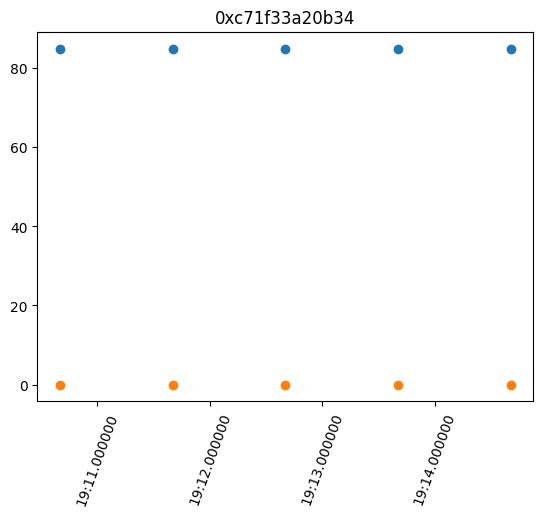

In [18]:
message = rq.get(URL + '/devices').json()
devices = message['mac_addresses']
print(devices)
for device in devices:
    now = round(time.time() * 1000)
    message = rq.get(URL + f'/device/{device}', params = {'from': now - DAY, 'to': now}).json()
    print(message)
    if message['timestamps']:
        plt.title(device)
        dates = [datetime.fromtimestamp(t/1000)for t in message['timestamps']]
        plt.plot_date(dates, message['battery_levels'])
        plt.xticks(rotation=70)
        plt.plot_date(dates, message['power_plugged'])
        plt.xticks(rotation=70)
if devices:
    rq.delete(URL + f'/device/{devices[-1]}')
    